<a href="https://colab.research.google.com/github/ghosesuvendu/dataScience/blob/main/recommendation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ratings_small.csv to ratings_small.csv


In [4]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
data = pd.read_csv(io.BytesIO(uploaded['ratings_small.csv']))



In [5]:
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


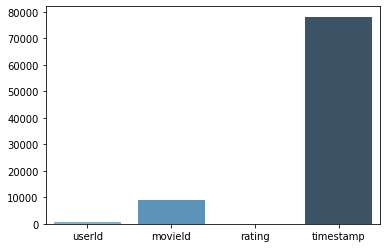

In [6]:
data.nunique(axis=0)
import seaborn as sns
sns.barplot(x=data.columns, y=data.nunique(axis=0), palette="Blues_d")

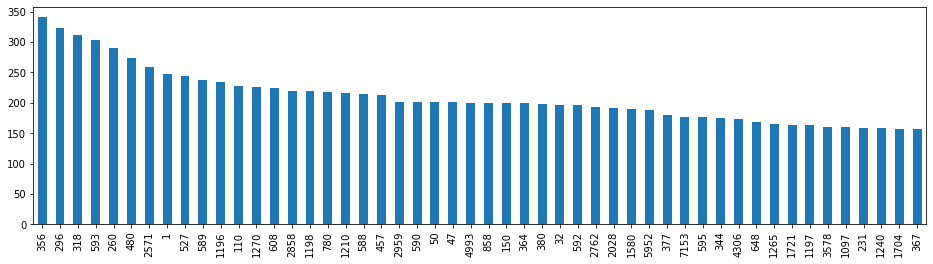

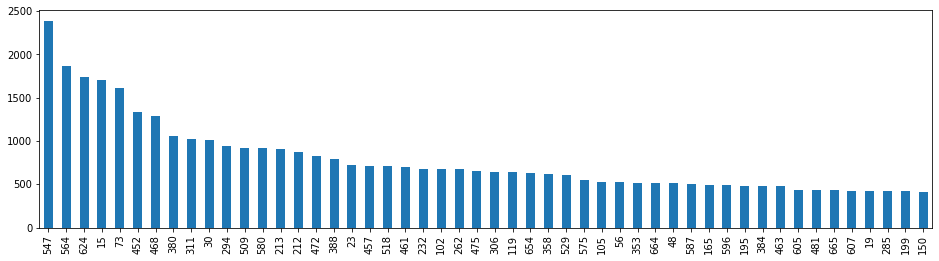

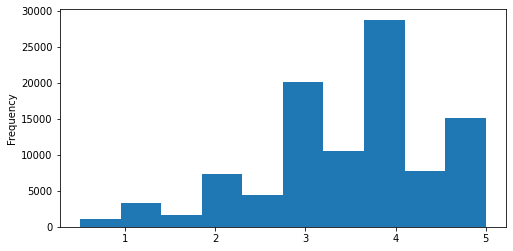

In [7]:
plt.figure(1, figsize=(16,4))
data['movieId'].value_counts()[:50].plot(kind = "bar")
plt.figure(2, figsize=(16,4))
data['userId'].value_counts()[:50].plot(kind = "bar")
plt.figure(3, figsize=(8,4))
data['rating'].plot(kind = "hist")

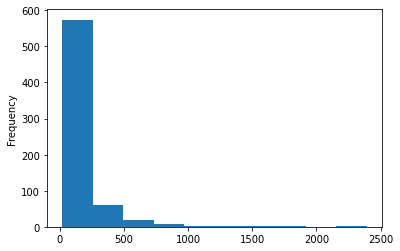

In [8]:
data.groupby('userId')['movieId'].count().plot(kind="hist")

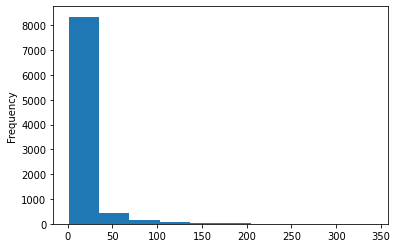

In [9]:
data.groupby('movieId')['userId'].count().plot(kind="hist")

In [10]:
data.groupby('movieId')['userId'].count().head


<bound method NDFrame.head of movieId
1         247
2         107
3          59
4          13
5          56
         ... 
161944      1
162376      1
162542      1
162672      1
163949      1
Name: userId, Length: 9066, dtype: int64>

In [11]:
!pip install surprise 

     |████████████████████████████████| 11.8 MB 10.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619431 sha256=69d7dd13111bfdb68b72d48807d84cbfc2557308b79dd60c6429f375a90d7d6d
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [12]:
from surprise import KNNWithMeans
from surprise import SVD

In [13]:
similarity = {"name": "cosine", "user": False}
algo_knn = KNNWithMeans(sim_options=similarity)
algo_svd = SVD()

In [14]:
data[['userId', 'movieId', 'rating']]

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [15]:
from surprise import Dataset
from surprise import Reader

reader = Reader(rating_scale=(0,5))
rating_df = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [16]:
from surprise.model_selection import cross_validate
cross_validate_KNN = cross_validate(algo_knn, rating_df, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cross_validate_SVD = cross_validate(algo_svd, rating_df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9214  0.9190  0.9132  0.9294  0.9324  0.9231  0.0070  
MAE (testset)     0.7066  0.7043  0.7019  0.7113  0.7137  0.7076  0.0044  
Fit time          0.43    0.46    0.45    1.29    1.04    0.73    0.36    
Test time         2.24    1.98    3.23    5.57    4.87    3.58    1.42    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8938  0.8982  0.8983  0.9020  0.8

In [17]:
from surprise.model_selection import train_test_split
from surprise import accuracy

# define train test function
def train_test_algo(algo, label):
    training_set, testing_set = train_test_split(rating_df, test_size = 0.2)
    algo.fit(training_set)
    test_output = algo.test(testing_set)
    test_df = pd.DataFrame(test_output)
    
    print("RMSE -",label, accuracy.rmse(test_output, verbose = False))
    print("MAE -", label, accuracy.mae(test_output, verbose=False))
    print("MSE -", label, accuracy.mse(test_output, verbose=False))
    
    return test_df

In [18]:
train_test_KNN = train_test_algo(algo_knn, "algo_KNN")
print(train_test_KNN.head())
train_test_SVD = train_test_algo(algo_svd, "algo_SVD")
print(train_test_SVD.head())

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE - algo_KNN 0.9186772340550277
MAE - algo_KNN 0.704816981295752
MSE - algo_KNN 0.8439678603709961
   uid   iid  r_ui       est                                    details
0  547   111   5.0  4.039790  {'actual_k': 40, 'was_impossible': False}
1  427  7256   4.0  4.338667   {'actual_k': 7, 'was_impossible': False}
2  309  6539   4.0  4.385156  {'actual_k': 40, 'was_impossible': False}
3  235  1030   4.0  3.888521  {'actual_k': 12, 'was_impossible': False}
4  214  1242   3.0  4.264990  {'actual_k': 40, 'was_impossible': False}
RMSE - algo_SVD 0.8981410841671226
MAE - algo_SVD 0.6916658030318276
MSE - algo_SVD 0.8066574070688943
   uid   iid  r_ui       est                    details
0  652  3044   4.0  4.617948  {'was_impossible': False}
1  660  1223   4.5  4.566542  {'was_impossible': False}
2  510  2750   4.0  2.835460  {'was_impossible': False}
3  509  1394   4.0  3.830676  {'was_impossible': False}
4  294 

In [19]:
from google.colab import files
uploaded = files.upload()

Saving movies_metadata.csv to movies_metadata.csv


In [20]:
movie_df = pd.read_csv(io.BytesIO(uploaded['movies_metadata.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
from google.colab import files
uploaded = files.upload()

Saving links.csv to links.csv


In [22]:
links_df = pd.read_csv(io.BytesIO(uploaded['links.csv']))

In [23]:
movie_df['imdb_id'] = movie_df['imdb_id'].apply(lambda x: str(x)[2:].lstrip("0"))
links_df['imdbId'] = links_df['imdbId'].astype(str)

In [24]:
movie_df['imdb_id']

0         114709
1         113497
2         113228
3         114885
4         113041
          ...   
45461    6209470
45462    2028550
45463     303758
45464       8536
45465    6980792
Name: imdb_id, Length: 45466, dtype: object

In [25]:
def prediction(algo, users_K):
    pred_list = []
    for userId in range(1,users_K):
        for movieId in range(1,9067):
            rating = algo.predict(userId, movieId).est
            pred_list.append([userId, movieId, rating])
    pred_df = pd.DataFrame(pred_list, columns = ['userId', 'movieId', 'rating'])
    return pred_df

In [27]:
def top_recommendations(pred_df, top_N):
    link_movie = pd.merge(pred_df, links_df, how='inner', left_on='movieId', right_on='movieId')
    recommended_movie = pd.merge(link_movie, movie_df, how='left', left_on='imdbId', right_on='imdb_id')[['userId', 'movieId', 'rating', 'movieId','imdb_id','title']]
    sorted_df = recommended_movie.groupby(('userId'), as_index = False).apply(lambda x: x.sort_values(['rating'], ascending = False)).reset_index(drop=True)
    top_recommended_movies = sorted_df.groupby('userId').head(top_N)
    return sorted_df, top_recommended_movies

In [29]:
# KNN predictions
pred_KNN = prediction(algo_knn, 10)
recommended_movies_KNN, top_recommended_movies_KNN = top_recommendations(pred_KNN, 3)
## SVD predictions
pred_SVD = prediction(algo_svd, 10)
recommended_movies_SVD, top_recommended_movies_SVD = top_recommendations(pred_SVD, 3)

In [31]:
top_recommended_movies_KNN



,userId,movieId,rating,movieId,imdb_id,title
0,1,3216,4.924354,3216,66380,Vampyros Lesbos
1,1,5071,4.902336,5071,220627,Maelström
2,1,4731,4.902336,4731,251141,Innocence
8341,2,5071,5.000000,5071,220627,Maelström
8342,2,8123,5.000000,8123,93913,Sammy and Rosie Get Laid
8343,2,4755,5.000000,4755,118178,Wish Upon a Star
16682,3,8261,5.000000,8261,75612,3 Women
16683,3,1563,5.000000,1563,119019,Dream with the Fishes
16684,3,6375,5.000000,6375,304081,Gigantic (A Tale Of Two Johns)
25023,4,3057,5.000000,3057,118150,Where's Marlowe?


In [32]:
top_recommended_movies_SVD 

,userId,movieId,rating,movieId,imdb_id,title
0,1,608,4.020602,608,116282,Fargo
1,1,318,3.976780,318,111161,The Shawshank Redemption
2,1,527,3.971519,527,108052,Schindler's List
8341,2,1221,4.636746,1221,71562,The Godfather: Part II
8342,2,922,4.562705,922,43014,Sunset Boulevard
8343,2,912,4.536770,912,34583,Casablanca
16682,3,318,4.520331,318,111161,The Shawshank Redemption
16683,3,2959,4.472921,2959,137523,Fight Club
16684,3,2329,4.452240,2329,120586,American History X
25023,4,593,5.000000,593,102926,The Silence of the Lambs
